# **Laboratorio 8: Ready, Set, Deploy! 👩‍🚀👨‍🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Espinoza
- Nombre de alumno 2: Juan Miño

### **Link de repositorio de GitHub:** [Laboratorio 8: MDS7202](https://github.com/juansebm/MDS7202)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

```python
def optimize_model():
    df = pd.read_csv("./water_potability.csv")
    df = df.dropna()

    X = df.drop(columns=["Potability"]).values
    y = df["Potability"].values

    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=191919,
        stratify=y,
    )

    experiment_name = f"{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    mlflow.set_experiment(experiment_name)

    mlflow.xgboost.autolog(log_models=True)

    def objective(trial):
        params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600, step=100),
        "max_depth": trial.suggest_int("max_depth", 2, 15),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True)
        }

        mlflow.start_run(run_name=f"trial_{trial.number}")
        mlflow.log_params(params)

        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        f1 = f1_score(y_valid, preds)

        mlflow.log_metric("f1", f1)
        mlflow.end_run()
        return f1

    study = optuna.create_study(direction="maximize")

    study.optimize(objective, n_trials=5, show_progress_bar=True)

    best_trial = study.best_trial
    print(f"Mejor f1: {best_trial.value:.4f}")
    print(f"Param: {best_trial.params}")

    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
    best_model = get_best_model(experiment_id)

    os.makedirs("models", exist_ok=True)
    model_path = "models/best_xgb.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(best_model, f)

    with mlflow.start_run(experiment_id=experiment_id, run_name="Best_Model", nested=True):
        mlflow.log_artifact(model_path, artifact_path="models")

        try:
            importances = best_model.get_booster().get_score(importance_type="gain")

            sorted_items = sorted(importances.items(), key=lambda x: x[1], reverse=True)
            names = [k for k, _ in sorted_items][:15]
            scores = [v for _, v in sorted_items][:15]

            plt.figure(figsize=(8, 6))
            plt.barh(range(len(names)), scores)
            plt.yticks(range(len(names)), names)
            plt.gca().invert_yaxis()
            plt.title("XGB Feature Importance (gain)")
            plt.tight_layout()

            os.makedirs("plots", exist_ok=True)
            fi_path = "plots/feature_importance.png"
            plt.savefig(fi_path)
            plt.close()
            
            mlflow.log_artifact(fi_path, artifact_path="plots")
        except Exception as e:
            print(f"{e}")

    return best_model

```

# **2. FastAPI (2.0 puntos)**

API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.


- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.

- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

A continuación dejamos añadida una imagen del archivo main.py para facilitar la revisión:

<div align="center">
  <img src="imagenes/imagen_main_py_1.png" width="800">
</div>

<div align="center">
  <img src="imagenes/imagen_main_py_2.png" width="800">
</div>

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. 

Primero que todo, antes de construir la imagen debemos tener abierto Docker Desktop. luego podemos ejecutar el comando 
```bash
docker build -t agua-potable-api .
```
cuyo resultado se puede ver a continuación: 



<div align="center">
  <img src="imagenes/imagen_construccion_de_imagen.png" width="800">
</div>


Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.

Primero que todo, vemos que hay un dockerignore:
<div align="center">
  <img src="imagenes/imagen_ls_all_dockerignore.png" width="600">
</div>



Por otro lado, podemos ver qué hay dentro del .dockerignore, en donde ignoramos las imagenes (producidas y guardadas para esta tarea, los archivos que empiezan por un punto como .DS_Store, etc.)

<div align="center">
  <img src="imagenes/punto_dockerignore.png" width="200">
</div>


2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.



3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.

Ahora exponemos el puerto en el Dockerfile para acceder a la ruta api sin tener que entrar al contenedor:
<div align="center">
  <img src="imagenes/imagen_dockerfile.png" width="300">
</div>


4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.

Primero que todo ejecutamos el comando en la terminal de Visual Studio Code:
```bash
docker run --name agua-potable-api -p 8000:8000 -v ./:/models agua-potable-api
```



<div align="center">
  <img src="imagenes/imagen_ejecucion_contenedor_resultado_1.png" width="600">
</div>

Luego nos metemos en el url: http://localhost:8000


<div align="center">
  <img src="imagenes/imagen_api_contenedor_resultado_2.png" width="400">
</div>


luego en http://localhost:8000/docs


<div align="center">
  <img src="imagenes/imagen_api_contenedor_resultado_3.png" width="400">
</div>


Y como tenemos en Potabilidad una sección para ingresar los parámetros de la nueva observación a ser clasificada por XGBoost, ponemos algunos números al azar, obteniendo que dicha muestra corresponde a agua no potable.

A continuación la versión basada en querys (anterior) y la nueva basada en un solicitud .json a http://localhost:8000


<div align="center">
  <img src="imagenes/imagen_api_contenedor_resultado_4.png" width="600">
</div>

<div align="center">
  <img src="imagenes/new_api.png" width="600">
</div>



5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

<div align="center">
  <img src="imagenes/imagen_recursos_contenedor_docker.png" width="800">
</div>

<div align="center">
  <img src="imagenes/imagen_recursos_contenedor.png" width="800">
</div>

Analizando estas métricas podemos decir lo siguiente:
- Uso de CPU – 0.26%

    - Extremadamente bajo. Indica que el contenedor está inactivo la mayor parte del tiempo o que su carga es muy liviana.
Bueno para APIs con llamadas de baja frecuencia.

- Uso de memoria – 113.3 MiB (1.45%) (cantidade de memoria usada sobre el límite de memoria disponible)

    - Muy razonable considerando que el sistema tiene ~7.6 GiB de RAM disponible.
Implica que la app no tiene cargas pesadas en memoria (modelos grandes, procesos intensivos, etc.).

- Red (NET I/O) – 5.87 kB / 10.4 kB (tráfico de red de entrada y salida)

    - Uso de red casi nulo. Lo esperable si la API recién fue desplegada o no ha recibido muchas solicitudes.

- I/O en disco (BLOCK I/O) – 0 B / 557 kB (cantidad de lectura y escritura en el disco)

    - Muy bajo. Probablemente solo accede a disco para lectura o logging simple.

- Número de procesos (PIDs) – 22 (estos eran el número de procesos, o hilos dentro del contenedor)

    - Un número razonable para un contenedor con una app de Python + servidor (como Uvicorn o Gunicorn), sin procesos pesados paralelos.

Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Esto significa que debemos entregar 4 archivos en un zip: `main.py`, `requirements.txt`, `Dockerfile` y `agua-potable-api.tar` (la imagen Docker de la aplicación)


## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?

La máquina virtual emula un sistema operativo completo (incluye su propio kernel), mientras que la arquitectura del docker consiste en compartir los recursos del sistema. Para el VM esto representa consumir mas espacio en disco (mientras que docker no empaqueta el sistema operativo, solo la app y sus dependencias).

Las VM pueden tardar varios minutos en inicializar porque deben inicializar en un sistema operativo completo, mientras que los contenedores se inician rápido ya que comparten el núcleo del sistema operativo, por lo que se permite escalabilidad y despliegue más rápido.

Además, las VM necesitan instalación manual del sistema. Los contenedores son gestionados por un motor dedicado, como Docker, y se construyen a partir de imágenes ligerass.


- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?

Ejecutar una aplicación directamente en el sistema local implica instalar manualmente todas las dependencias, configuraciones y versiones necesarias, lo que puede variar entre equipos y causar errores.

En cambio, Docker encapsula la aplicación junto con su entorno (dependencias, librerías, sistema de archivos) en un contenedor. Esto garantiza que se ejecute exactamente igual en cualquier máquina, evitando el problema de “funciona en mi computador pero no en producción (o deployment)". Lo único que Docker no puede empaquetar es el Hardware o infraestructura física de cada computador (pero no estan grave la mayoría de las veces).


- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?

Docker asegura consistencia porque todo el entorno de ejecución (dependencias, configuración, sistema operativo base, etc.) se define en un Dockerfile y se empaqueta en una imagen.

Esto significa que el mismo contenedor que funciona en desarrollo puede desplegarse en producción sin cambios, eliminando diferencias entre entornos y reduciendo errores.


- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?

Los volúmenes son una forma de almacenar datos que persisten incluso después de que el contenedor ha sido eliminado. Permiten que los contenedores lean y escriban datos directamente en el sistema de archivos del host (una carpeta arbitraria en el sentido de que es elegida por el usuario). 

Las características que tienen los volúmenes son: persistencia (los datos persisten más allá del ciclo de vida del contenedor), desempeño (son gestionados por docker y están optimizados para el rendimiento), compatibilidad (funcionan de la misma manera en diferentes sistemas operativos, proporcionando una forma coherente de manejar el almacenamiento), tienen backups y restauraciones (son fáciles de respaldar y restaurar, ya que están ubicados en el sistema de archivos del host) y por último tienen compatibilidad entre contenedores (varios contenedores pueden tener el mismo volumen, lo que facilita el intercambio de datos).


- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

Dockerfile es un archivo de texto que contiene instrucciones para construir una imagen Docker.
Define el entorno (SO base, dependencias, comandos, puertos, etc.) en el que correrá la aplicación. Es la receta para construir un contenedor reproducible.


docker-compose.yml es un archivo de configuración en YAML que permite orquestar o definir múltiples contenedores, redes, volúmenes y servicios (por ejemplo, una app + base de datos + volumen).
Facilita la gestión de entornos complejos con una sola orden (docker-compose up), incluyendo redes, volúmenes y dependencias entre servicios. Cada uno de los servicios se ejecuta en un contenedor separado y puede depender de otros servicios.

# Conclusión

Éxito!
<div align="center">
  <img src="https://i.pinimg.com/originals/55/f5/fd/55f5fdc9455989f8caf7fca7f93bd96a.gif" width="500">
</div>

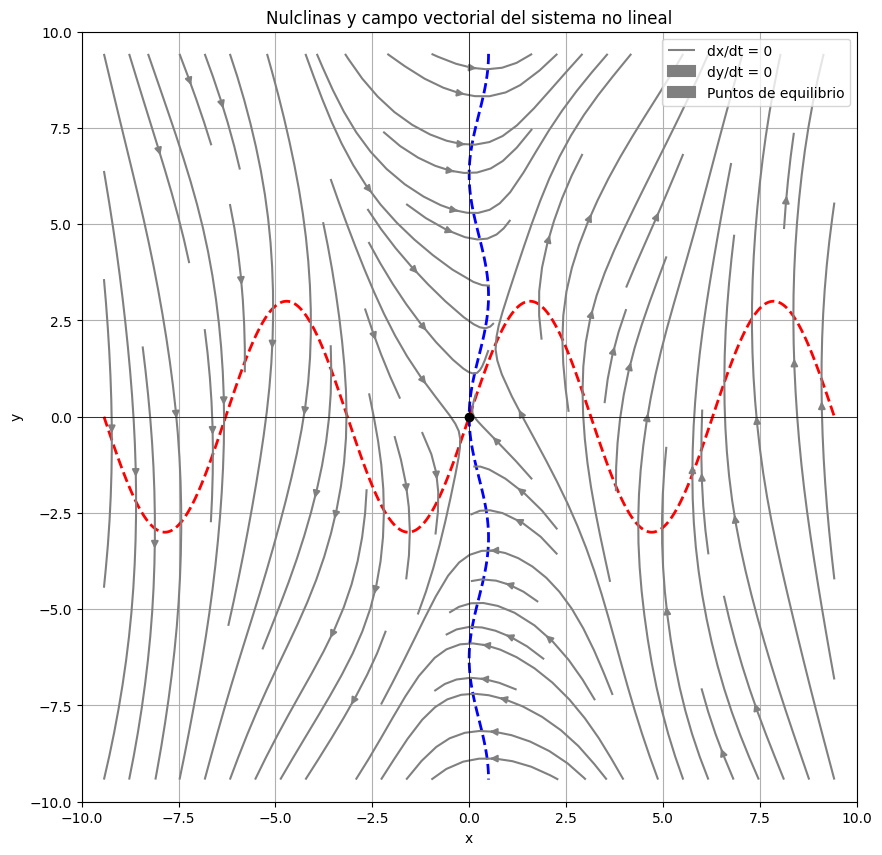

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x = np.linspace(-3*np.pi, 3*np.pi, 400)
y = np.linspace(-3*np.pi, 3*np.pi, 400)
X, Y = np.meshgrid(x, y)

dx = Y - 3 * np.sin(X)
dy = 4 * X + np.cos(Y) - 1

plt.figure(figsize=(10, 10))
cont1 = plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2)
cont2 = plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2)


U = dx
V = dy
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N
plt.streamplot(X, Y, U_norm, V_norm, color='gray', density=1)


guesses = [(-np.pi, 0), (0, 0), (np.pi, 0), (-2*np.pi, 0), (2*np.pi, 0)]
equilibria = []

def system(p):
    x, y = p
    return [y - 3*np.sin(x), 4*x + np.cos(y) - 1]

for guess in guesses:
    sol = fsolve(system, guess)
    
    if not any(np.allclose(sol, eq, atol=1e-2) for eq in equilibria):
        equilibria.append(sol)


for eq in equilibria:
    plt.plot(eq[0], eq[1], 'ko')  


plt.title("Nulclinas y campo vectorial del sistema no lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(["dx/dt = 0", "dy/dt = 0", "Puntos de equilibrio"])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


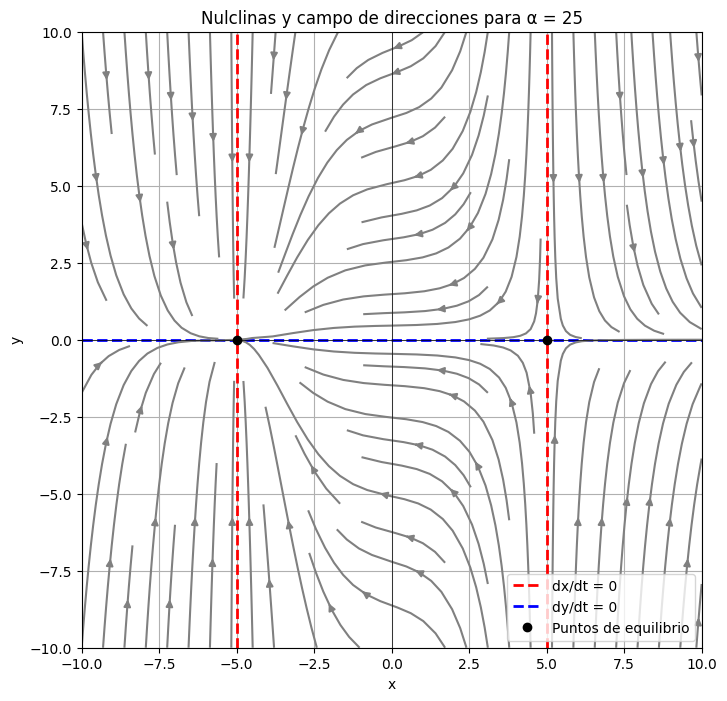

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 25


x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)


dx = X**2 - alpha
dy = -Y * (X**2 + 1)


plt.figure(figsize=(8, 8))


plt.axvline(x=-5, color='red', linestyle='--', linewidth=2, label='dx/dt = 0')
plt.axvline(x=5, color='red', linestyle='--', linewidth=2)


plt.axhline(y=0, color='blue', linestyle='--', linewidth=2, label='dy/dt = 0')


U = dx
V = dy
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N
plt.streamplot(X, Y, U_norm, V_norm, color='gray', density=1)


equilibria_x = [-5, 5]
equilibria_y = [0, 0]
plt.plot(equilibria_x, equilibria_y, 'ko', label='Puntos de equilibrio')


plt.title('Nulclinas y campo de direcciones para α = 25')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_1446/1140620789.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2, label='dx/dt = 0')
/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_1446/1140620789.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2, label='dy/dt = 0')


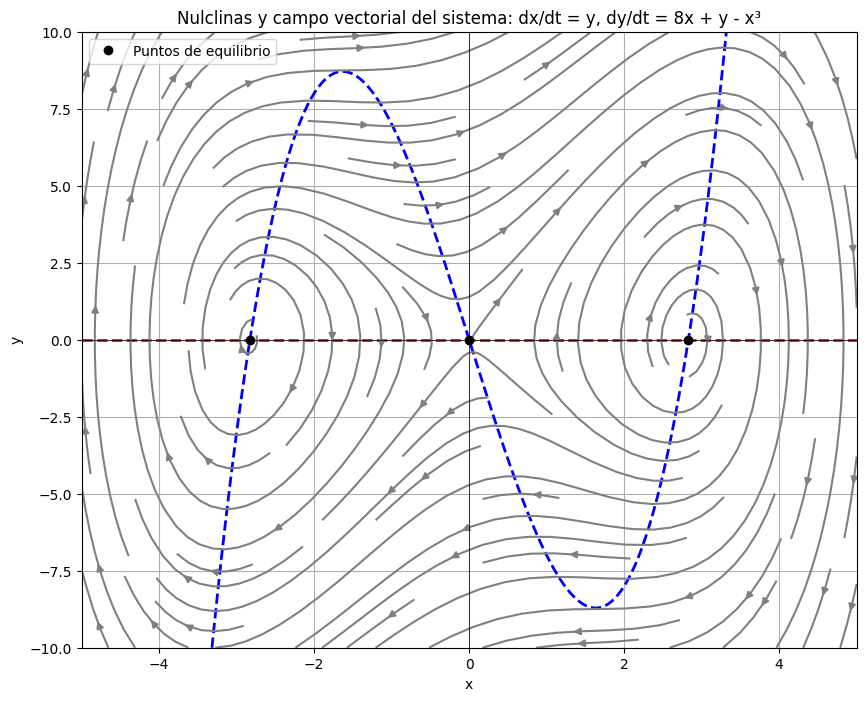

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)


dx = Y
dy = 8*X + Y - X**3






plt.figure(figsize=(10, 8))

plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2, label='dx/dt = 0')
plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2, label='dy/dt = 0')


U = dx
V = dy
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N
plt.streamplot(X, Y, U_norm, V_norm, color='gray', density=1)



equilibria_x = [0, -np.sqrt(8), np.sqrt(8)]
equilibria_y = [0, 0, 0]


plt.plot(equilibria_x, equilibria_y, 'ko', label='Puntos de equilibrio')


plt.title('Nulclinas y campo vectorial del sistema: dx/dt = y, dy/dt = 8x + y - x³')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-10, 10)
plt.show()


/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_1446/3145646894.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2, label='dx/dt = 0')
/var/folders/09/2_xdwnnx5rqgtl8vh2vwkdmc0000gn/T/ipykernel_1446/3145646894.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2, label='dy/dt = 0')


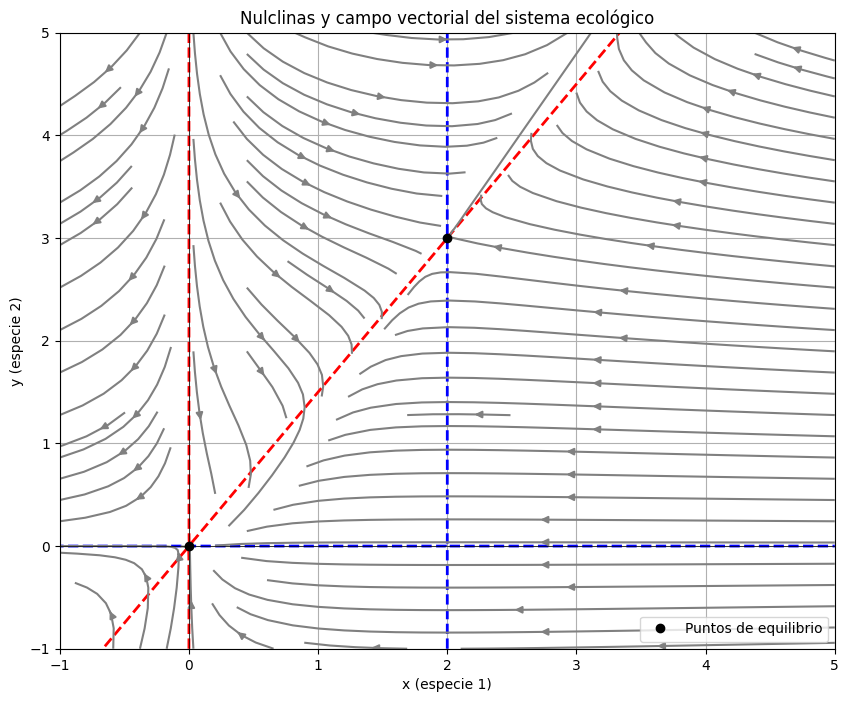

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-1, 5, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)


dx = -90*X**2 + 60*X*Y
dy = -40*Y + 20*X*Y


plt.figure(figsize=(10, 8))
plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2, label='dx/dt = 0')
plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2, label='dy/dt = 0')


U = dx
V = dy
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N
plt.streamplot(X, Y, U_norm, V_norm, color='gray', density=1)


equilibria_x = [0, 2]
equilibria_y = [0, 3]
plt.plot(equilibria_x, equilibria_y, 'ko', label='Puntos de equilibrio')


plt.title("Nulclinas y campo vectorial del sistema ecológico")
plt.xlabel("x (especie 1)")
plt.ylabel("y (especie 2)")
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


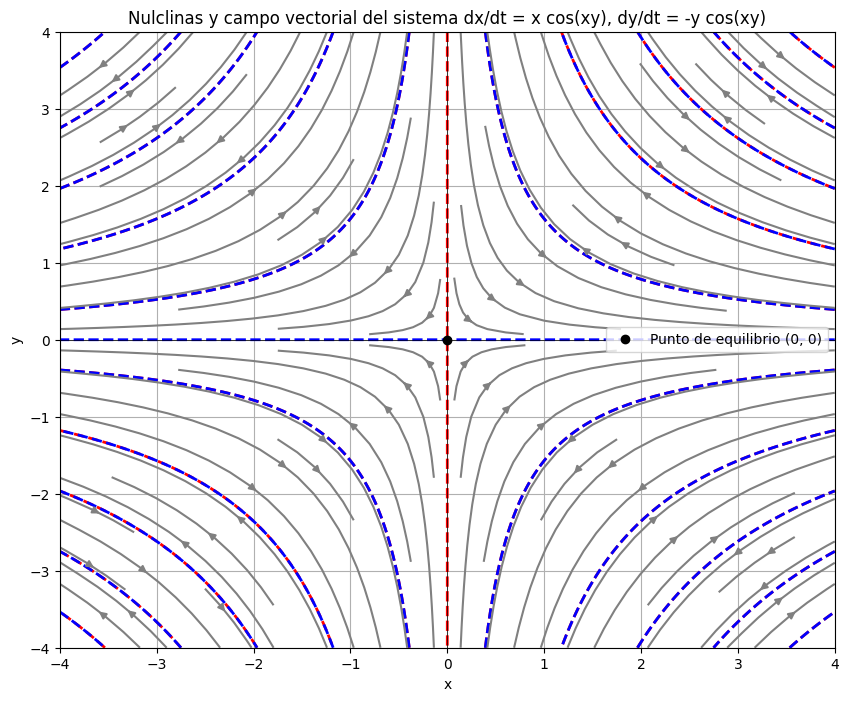

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-4, 4, 500)
y = np.linspace(-4, 4, 500)
X, Y = np.meshgrid(x, y)


xy = X * Y
dx = X * np.cos(xy)
dy = -Y * np.cos(xy)


plt.figure(figsize=(10, 8))


plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2)

plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2)


N = np.sqrt(dx**2 + dy**2)
U = dx / N
V = dy / N
plt.streamplot(X, Y, U, V, color='gray', density=1)


plt.plot(0, 0, 'ko', label='Punto de equilibrio (0, 0)')


plt.title("Nulclinas y campo vectorial del sistema dx/dt = x cos(xy), dy/dt = -y cos(xy)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()


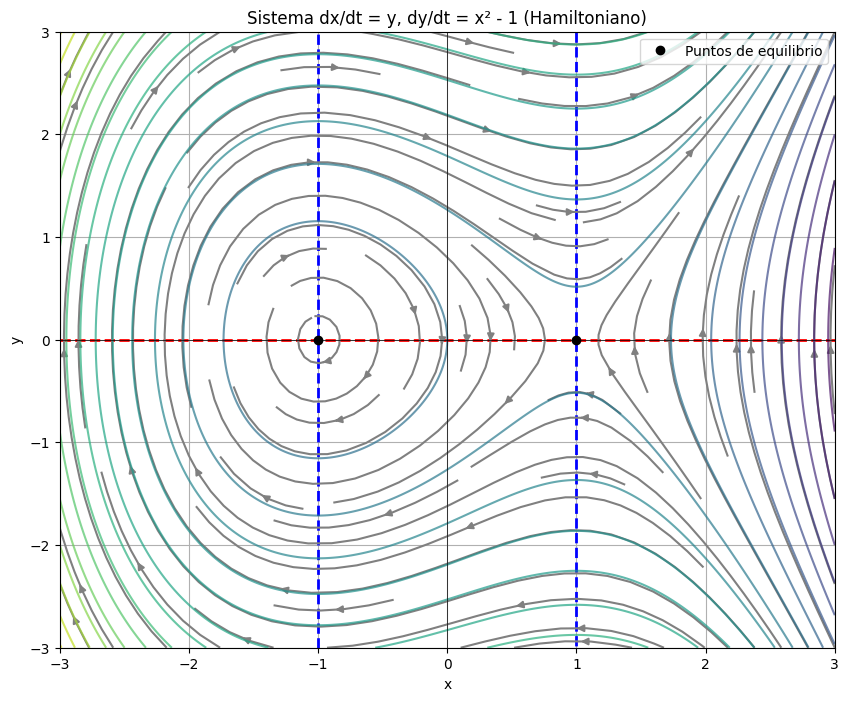

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)


dx = Y
dy = X**2 - 1


H = 0.5 * Y**2 - (1/3)*X**3 + X


plt.figure(figsize=(10, 8))
plt.contour(X, Y, dx, levels=[0], colors='red', linestyles='--', linewidths=2)
plt.contour(X, Y, dy, levels=[0], colors='blue', linestyles='--', linewidths=2)


N = np.sqrt(dx**2 + dy**2)
U = dx / N
V = dy / N
plt.streamplot(X, Y, U, V, color='gray', density=1)


plt.plot([-1, 1], [0, 0], 'ko', label='Puntos de equilibrio')


plt.contour(X, Y, H, levels=20, cmap='viridis', alpha=0.7)


plt.title("Sistema dx/dt = y, dy/dt = x² - 1 (Hamiltoniano)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
